# Iniciação Científica - Rastreador GPS Personalizável Inteligente

## Aluno: Miguel Mendes Daia Cicci
## Orientador: Frederico Renato Gomes

# Dados de localização

## Google Maps

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [18]:
rotas_path = 'C:/workspace/IC/IC_2/data/rotas.xlsx'
rotas = pd.read_excel(rotas_path)
rotas

,latitude,longitude
0,-19.768875,-47.945313
1,-19.769348,-47.945514
2,-19.769915,-47.945815
3,-19.770246,-47.945815
4,-19.770387,-47.946518
...,...,...
289,-19.712019,-47.961594
290,-19.711504,-47.961497
291,-19.711161,-47.961701
292,-19.710979,-47.961862


<Axes: xlabel='latitude', ylabel='longitude'>

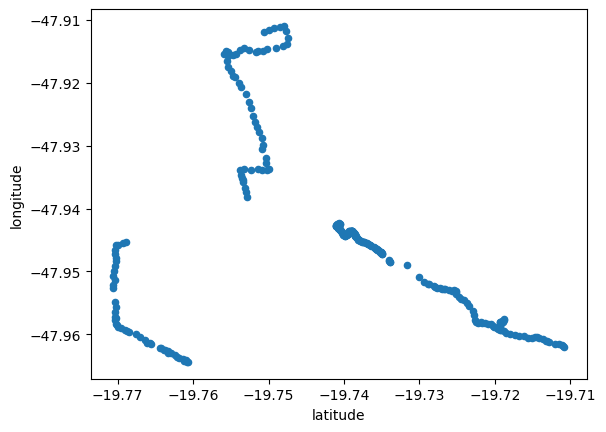

In [19]:
rotas.plot(x='latitude', y='longitude', kind='scatter')

Padronizar dados X Normalizar dados

In [20]:
scaler = StandardScaler()

In [21]:
rotas_p = scaler.fit_transform(rotas)
rotas_p = pd.DataFrame(rotas_p,columns=['latitude','longitude'])
rotas_p

,latitude,longitude
0,-1.737784,0.001388
1,-1.767918,-0.013498
2,-1.804079,-0.035828
3,-1.825172,-0.035828
4,-1.834212,-0.087930
...,...,...
289,1.887390,-1.205104
290,1.920233,-1.197949
291,1.942129,-1.213055
292,1.953721,-1.224981


<Axes: xlabel='latitude', ylabel='longitude'>

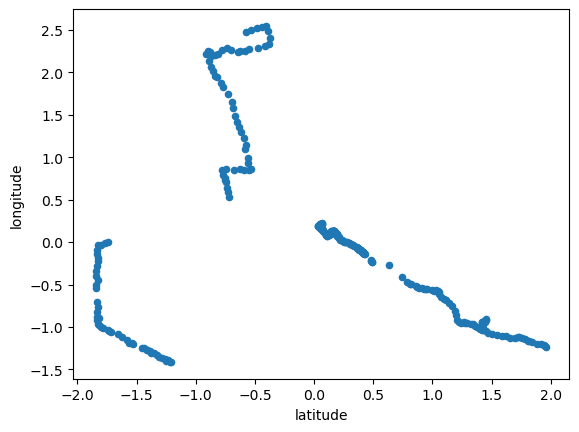

In [22]:
rotas_p.plot(x='latitude', y='longitude', kind='scatter')

# Aplicar algoritmo de clusterização DBSCAN

## (Density-Based Spatial Clustering of Applications with Noise)

Parametros do DBSCAN

In [23]:
raio = 0.13 #raio das distancias de um ponto até outro
minimo_pontos = 2 #quantidade de pontos para classificar um cluster

In [24]:
dbscan = DBSCAN(eps=raio,min_samples=minimo_pontos)
dbscan_fit = dbscan.fit(rotas_p)

In [25]:
rotulos_padroes = dbscan_fit.labels_ #Array constituido por -1 significa que ele não conseguiu identificar os klusters
rotulos_padroes
rotas_p['rotulos'] = rotulos_padroes
rotas_p

,latitude,longitude,rotulos
0,-1.737784,0.001388,0
1,-1.767918,-0.013498,0
2,-1.804079,-0.035828,0
3,-1.825172,-0.035828,0
4,-1.834212,-0.087930,0
...,...,...,...
289,1.887390,-1.205104,3
290,1.920233,-1.197949,3
291,1.942129,-1.213055,3
292,1.953721,-1.224981,3


<function matplotlib.pyplot.show(close=None, block=None)>

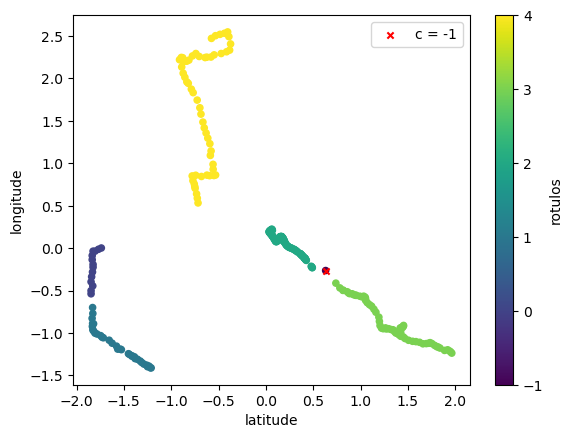

In [26]:
ax = rotas_p.plot(x='latitude',y='longitude'
            ,xlabel='Latitude',ylabel='Longitude',
            kind='scatter',c='rotulos',cmap='viridis')

rotas_negativas = rotas_p[rotas_p['rotulos']==-1]
rotas_negativas.plot(
    x='latitude',
    y='longitude',
    kind='scatter',
    color='red',
    marker='x',
    ax=ax,  # Plota no mesmo gráfico
    label='c = -1'
)

plt.show

# Novos dados

In [27]:
# dados_novos = [(-19.725129984827152, -47.95321195366353),
# (-19.724847204297333, -47.95311539414036),
# (-19.724665416549634, -47.95294373276583),
# (-19.724473529258265, -47.95283644440675),
# (-19.7242917410855, -47.95257895234496),
# (-19.72412005206577, -47.952396562134524),
# (-19.72409985334546, -47.95227854493953),
# (-19.723928164119577, -47.95219271425227),
# (-19.723756474709248, -47.95219271425227),
# (-19.723665580240862, -47.952224900759994),
# (-19.723524188742868, -47.95228927377545),
# (-19.723392896525567, -47.952396562134524),
# (-19.7232313059562, -47.95237510446271),
# (-19.723241405371578, -47.95246093514997),
# (-19.723261604200406, -47.95260041001678),
# (-19.72319090828834, -47.95267551186814),
# (-19.72308991407398, -47.95267551186814),
# (-19.7229990192265, -47.95278280022721),
# (-19.7229384226328, -47.95301883461719),
# (-19.72290812432733, -47.95310466530446),
# (-19.722837428258895, -47.95321195366353),
# (-19.72267583712791, -47.953405072709884)]

dados_novos = [(-19.72267583712791, -47.953405072709884)]

dados_novos = pd.DataFrame(data=dados_novos,columns=['latitude','longitude'])
dados_novos['rotulos'] = 1

<Axes: xlabel='latitude', ylabel='longitude'>

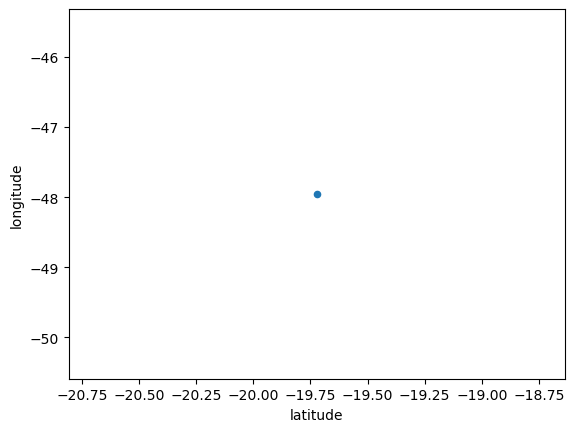

In [28]:
dados_novos.plot(x='latitude',y='longitude',kind='scatter')

In [29]:
rotas['rotulos'] = 2
dados_juntos = pd.concat([rotas, dados_novos])

<Axes: xlabel='latitude', ylabel='longitude'>

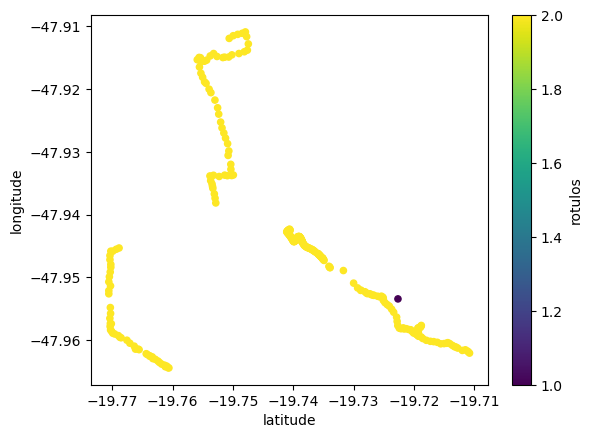

In [30]:
dados_juntos.plot(x='latitude',y='longitude',kind='scatter',c='rotulos',cmap='viridis')

<Axes: xlabel='latitude', ylabel='longitude'>

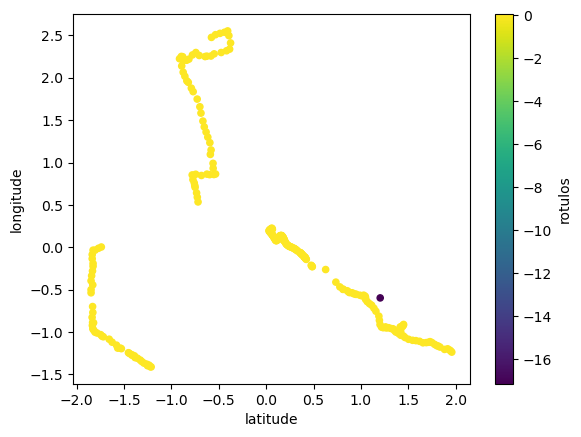

In [31]:
dados_juntos_p = scaler.fit_transform(dados_juntos)
dados_juntos_p = pd.DataFrame(data=dados_juntos_p,columns=['latitude','longitude','rotulos'])
dados_juntos_p.plot(x='latitude',y='longitude',kind='scatter',c='rotulos',cmap='viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

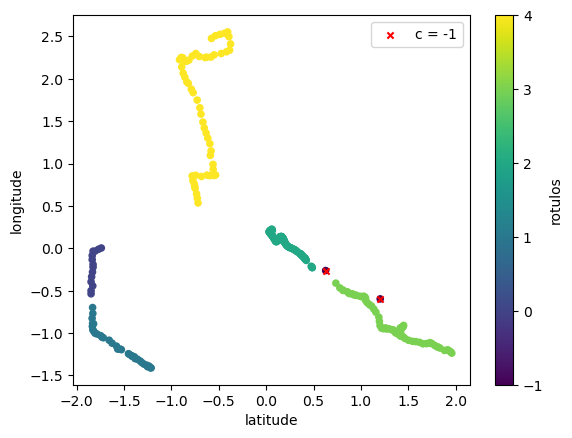

In [35]:
dbscan_test = dbscan.fit_predict(dados_juntos_p)
dados_juntos_p['rotulos'] = dbscan_test

ax = dados_juntos_p.plot(x='latitude',y='longitude'
            ,xlabel='Latitude',ylabel='Longitude',
            kind='scatter',c='rotulos',cmap='viridis')

rotas_negativas = dados_juntos_p[dados_juntos_p['rotulos']==-1]
rotas_negativas.plot(
    x='latitude',
    y='longitude',
    kind='scatter',
    color='red',
    marker='x',
    ax=ax,  # Plota no mesmo gráfico
    label='c = -1'
)

plt.show

In [16]:
# def predict(lat,long):
#     position = pd.DataFrame(data=rotas,columns=['latitude','longitude'])
#     dados_j = pd.concat([rotas,position])
#     dados_jp = scaler.fit_transform(dados_j)
#     rotulosjp = dbscan.fit_predict(dados_jp)
#     if np.isin(-1,rotulosjp):
#         print('Ponto anomalo: '+ str(lat)+str(long))
#     # else:
#     #     print('Ponto padrão: '+ str(lat)+','+str(long))
#     #normalizar dados
#     #juntar dados com o dataset padrão
#     #agrupar com DBSCAN
#     #verificar rotulos = -1
#     #retirar dados do dataset padrão
#     #adicionar dados rotulados a novo dataset

# rotas.drop(columns='rotulos',inplace=True)

# for lat, long in zip(dados_juntos_p['latitude'], dados_juntos_p['longitude']):
#     predict(lat,long)
